# COVID-19-Portugal - Last 60 Days Daily Evolution  

<div style="float:right; a.color: grey;">
        <a href="https://github.com/matosdotnet">
        <img src="https://avatars3.githubusercontent.com/u/64945038?s=60&v=4">
        matosdotnet
    </a>
</div>

<ul> 
        <li>New Cases</li>
        <li>New Deaths</li>
        <li>New Suspects</li>
        <li>New Recovered</li>
      </ul>
<div>
       Data Source: 
        <a href="https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv">https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv</a>
       <br/>
Ref:
        <br/>
        <a href="https://covid19.min-saude.pt/relatorio-de-situacao/">DGS Reports<a>
        <br/>
        <a href="https://github.com/dssg-pt/covid19pt-data">covid19pt-data<a>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime
%matplotlib inline

# Define the last number of days here
nr_last_days = 60
s_title = 'COVID-19 Portugal'
s_url = 'https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv'
s_local_snapshot_path = 'data/data-pt.csv'

In [2]:
#define dictionaries with metadata
d_confirmations = {'key' : 'confirmados', 'label' : 'Cases', 'color' : '#00D0FE'}
d_new_confirmations = {'key' : 'confirmados_novos', 'label' : 'New Cases', 'color' : '#00D0FE'}

d_deaths = {'key' : 'obitos', 'label' : 'Deaths', 'color' : '#FE0004'}
d_new_deaths = {'key' : 'obitos_novos', 'label' : 'New Deaths', 'color' : '#FE0004'}

d_suspects = {'key' : 'suspeitos', 'label' : 'Suspects', 'color' : '#FE6C00'}
d_new_suspects = {'key' : 'suspeitos_novos', 'label' : 'New Suspects', 'color' : '#FE6C00'}

d_recoveries = {'key' : 'recuperados', 'label' : 'Recoveries', 'color' : '#7FFE00'}
d_new_recoveries = {'key' : 'recuperados_novos', 'label' : 'New Recoveries', 'color' : '#7FFE00'}

d_patients = {'key' : 'internados', 'label' : 'Patients', 'color' : '#FEFE00'}
d_new_patients = {'key' : 'internados_novos', 'label' : 'New Patients', 'color' : '#FEFE00'}

d_icu = {'key' : 'internados_uci', 'label' : 'ICU Patients', 'color' : '#FEFE00'}
d_new_icu = {'key' : 'internados_uci_novos', 'label' : 'New ICU Patients', 'color' : '#FEFE00'}

d_active = {'key' : 'activos', 'label' : 'Active', 'color' : '#FE0004'}
d_new_active = {'key' : 'activos_novos', 'label' : 'New Active', 'color' : '#FE00F6'}

d_tested = {'key' : 'lab', 'label' : 'Tested', 'color' : '#FE0004'}
d_new_tested = {'key' : 'lab_novos', 'label' : 'New Tested', 'color' : '#FE00C4'}

df_regions =pd.DataFrame('North,Center,Lisbon and Tagus Valley,Alentejo,Algarve,Azores,Madeira'.split(',')
                        ,index='arsnorte arscentro arslvt arsalentejo arsalgarve acores madeira'.split(),columns=['label'])
df_events = pd.DataFrame('EM,Phase1,Phase2,Phase3'.split(','),index=[datetime.date(2020,3,18),datetime.date(2020,5,4),datetime.date(2020,5,18),datetime.date(2020,6,1)],columns=['label'])

In [3]:
def read_data_remote() : 
    # Read Source Data
    df_full = pd.read_csv(s_url)
    # Manage Dates Formating and Set Index
    df_full['data'] = df_full['data'].apply(lambda x : pd.to_datetime(x,format='%d-%m-%Y'))
    df_full['data_dados'] = df_full['data_dados'].apply(lambda x : pd.to_datetime(x,format='%d-%m-%Y %H:%M'))
    df_full = df_full.set_index('data_dados')
    df_full.fillna(0, inplace=True)
    #Active
    df_full[d_active['key']] = df_full[d_confirmations['key']] - df_full[d_recoveries['key']]- df_full[d_deaths['key']]
    #Create regional Active cases
    for region in df_regions.index :
        df_full['{}_{}'.format(d_active['key'],region)] = df_full['{}_{}'.format(d_confirmations['key'],region)] - df_full['{}_{}'.format(d_recoveries['key'],region)]- df_full['{}_{}'.format(d_deaths['key'],region)]
    #Create daily new and % change
    temp_df = df_full.drop(['data','confirmados_novos'],axis=1)    
    df_full[temp_df.add_suffix('_novos_pct').columns] = df_full[temp_df.columns].pct_change()
    df_full[temp_df.add_suffix('_novos').columns] = df_full[temp_df.columns].diff()     
    # Save a snapshot
    df_full.to_csv(s_local_snapshot_path)
    return df_full
    
def read_data_local() : 
    df_full = pd.read_csv(s_local_snapshot_path)
    df_full['data'] = df_full['data'].apply(lambda x : pd.to_datetime(x))
    df_full['data_dados'] = df_full['data_dados'].apply(lambda x : pd.to_datetime(x))
    df_full = df_full.set_index('data_dados')
    return df_full
    
def read_data() : 
    df_full = pd.DataFrame()
    try:
        df_full = read_data_remote()
    except:
        df_full = read_data_local()
        print("An exception occurred reading data from {}\nAlternatively the latest Snapshot from {} was retrieved.".format(s_url,df_full.index.max()))
    else:
         print("Data collected sucessfully from {}\nMax data set date: {}".format(s_url,df_full.index.max()))          
    return df_full

In [4]:
#Read Data
df_full  = read_data()
# Slice the last days
df_latest = df_full.tail(nr_last_days )

Data collected sucessfully from https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv
Max data set date: 2020-05-30 00:00:00


In [5]:
df_latest[[d_confirmations['key'],d_new_confirmations['key'],d_deaths['key'],d_new_deaths['key'],d_suspects['key'],d_new_suspects['key'],d_recoveries['key'],d_new_recoveries['key'],d_icu['key'],d_new_icu['key'],d_new_active['key'],d_new_tested['key']]].tail(1)

confirmados  confirmados_novos  obitos  obitos_novos  suspeitos  \
data_dados                                                                    
2020-05-30        32203              257.0    1396          13.0     323663   

            suspeitos_novos  recuperados  recuperados_novos  internados_uci  \
data_dados                                                                    
2020-05-30           2373.0        19186              275.0            63.0   

            internados_uci_novos  activos_novos  lab_novos  
data_dados                                                  
2020-05-30                  -3.0          -31.0      566.0

In [6]:
# Last X count days overall description
df_latest[[d_new_confirmations['key'],d_new_deaths['key'],d_new_suspects['key'],d_new_recoveries['key'],d_new_patients['key'],d_new_icu['key'],d_new_active['key'],d_new_tested['key']]].describe()

confirmados_novos  obitos_novos  suspeitos_novos  recuperados_novos  \
count          60.000000     60.000000        60.000000          60.000000   
mean          412.666667     20.600000      4526.283333         319.050000   
std           258.496282      8.487678      3627.402624        1284.447549   
min            92.000000      6.000000       161.000000           0.000000   
25%           222.000000     13.750000      2470.000000          20.250000   
50%           326.500000     19.500000      3557.500000          49.500000   
75%           564.250000     27.250000      5553.750000         193.000000   
max          1516.000000     37.000000     24893.000000        9844.000000   

       internados_novos  internados_uci_novos  activos_novos    lab_novos  
count         60.000000             60.000000      60.000000    60.000000  
mean          -1.883333             -2.083333      73.016667   -41.266667  
std           54.340762             11.369438    1353.702838   606.394705  
min          -96.000000            -40.000000   -9706.000000 -2102.000000  
25%          -27.000000             -7.000000      73.250000  -217.000000  
50%          -11.000000             -3.000000     202.500000   -30.000000  
75%            8.250000              1.250000     458.750000   259.000000  
max          316.000000             42.000000    1462.000000  1586.000000

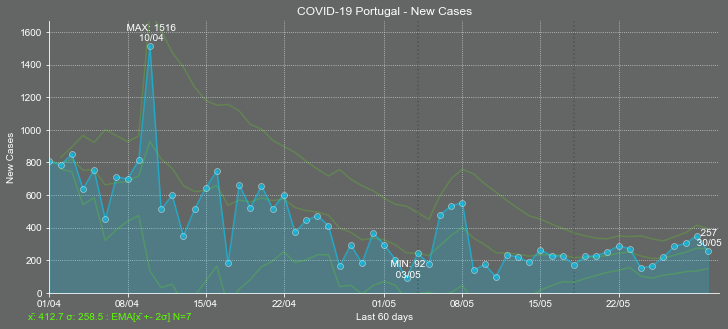

In [7]:
from MatosDotNetStandardCharts import line_plot_df_tindex 
line_plot_df_tindex(
                d_new_confirmations['key']
                ,data=df_latest
                ,title='{} - {}'.format(s_title,d_new_confirmations['label'])
                ,ylabel=d_new_confirmations['label']
                ,ycolor=d_new_confirmations['color']
                ,evends_data = df_events
               )

In [8]:
# Trace outstanding vales
df_latest[[d_confirmations['key'],d_new_confirmations['key']]]['2020-04-09':'2020-04-11']

confirmados  confirmados_novos
data_dados                                
2020-04-09        13956              815.0
2020-04-10        15472             1516.0
2020-04-11        15987              515.0

<a href="https://covid19.min-saude.pt/wp-content/uploads/2020/04/39_DGS_boletim_20200410.pdf">Relatório de Situação nº 039 | 10/04/2020</a>
<br/>
    <a href="https://www.publico.pt/2020/04/10/sociedade/noticia/covid19-ha-26-mortes-1516-infectados-portugal-1911826">Covid-19: há mais 26 mortes e mais 1516 infectados em Portugal<a/>
    <br/>
    <a href="https://www.jornaldenegocios.pt/economia/coronavirus/detalhe/morreram-mais-26-pessoas-em-portugal-com-covid-19-e-casos-confirmados-aumentam-mais-de-10">Morreram mais 26 pessoas em Portugal com covid-19 e casos confirmados aumentam mais de 10%</a>

In [9]:
df_latest[[d_confirmations['key'],d_new_confirmations['key']]]['2020-05-01':'2020-05-02']

confirmados  confirmados_novos
data_dados                                
2020-05-01        24987              295.0
2020-05-02        25190              203.0

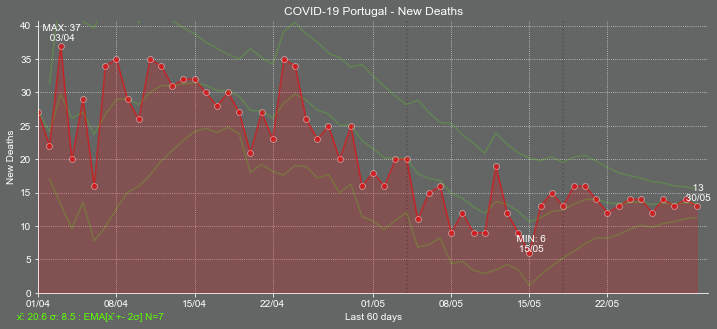

In [10]:
line_plot_df_tindex(
                d_new_deaths['key']
                ,data=df_latest
                ,title='{} - {}'.format(s_title,d_new_deaths['label'])
                ,ylabel=d_new_deaths['label']
                ,ycolor=d_new_deaths['color']
                ,evends_data = df_events
               )

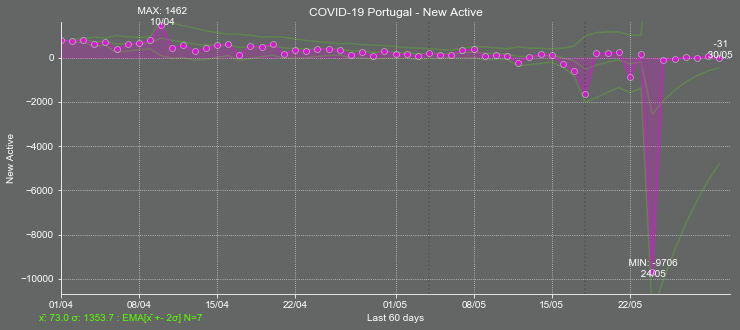

In [11]:
line_plot_df_tindex(
                d_new_active['key']
                ,data=df_latest
                ,title='{} - {}'.format(s_title,d_new_active['label'])
                ,ylabel=d_new_active['label']
                ,ycolor=d_new_active['color']
                ,evends_data = df_events
               )

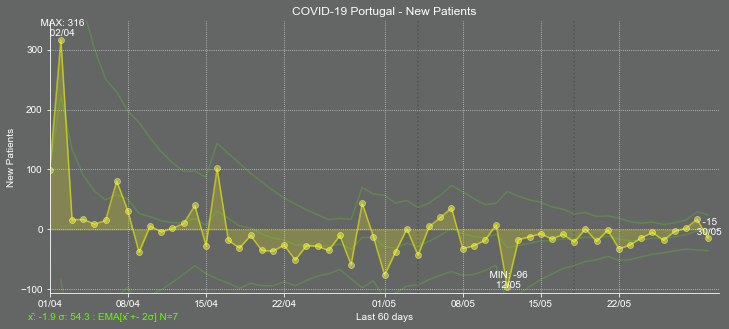

In [12]:
line_plot_df_tindex(
                d_new_patients['key']
                ,data=df_latest
                ,title='{} - {}'.format(s_title,d_new_patients['label'])
                ,ylabel=d_new_patients['label']
                ,ycolor=d_new_patients['color']
                ,evends_data = df_events
               )

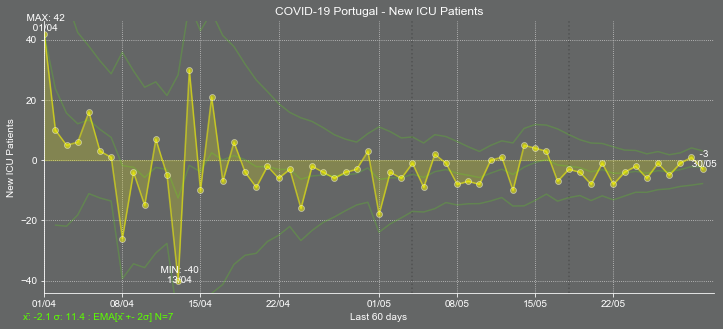

In [13]:
line_plot_df_tindex(
                d_new_icu['key']
                ,data=df_latest
                ,title='{} - {}'.format(s_title,d_new_icu['label'])
                ,ylabel=d_new_icu['label']
                ,ycolor=d_new_icu['color']
                ,evends_data = df_events
               )

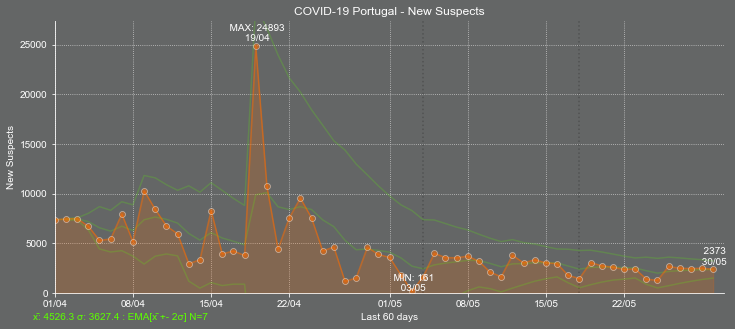

In [14]:
line_plot_df_tindex(
                d_new_suspects['key']
                ,data=df_latest
                ,title='{} - {}'.format(s_title,d_new_suspects['label'])
                ,ylabel=d_new_suspects['label']
                ,ycolor=d_new_suspects['color']
                ,evends_data = df_events
               )

In [15]:
# Trace outstanding vales
df_latest[[d_suspects['key'],d_new_suspects['key']]]['2020-04-18':'2020-04-20']

suspeitos  suspeitos_novos
data_dados                            
2020-04-18     162711           3771.0
2020-04-19     187604          24893.0
2020-04-20     198353          10749.0

<a href="https://covid19.min-saude.pt/wp-content/uploads/2020/04/48_DGS_boletim_20200419.pdf">Relatório de Situação nº 048 | 19/04/2020</a> 
<br/>
    <a href="https://rr.sapo.pt/2020/04/22/pais/dgs-explica-aumento-de-35-mil-casos-suspeitos-com-atraso-nas-notificacoes/noticia/190207/">DGS explica aumento de 35 mil casos suspeitos com atraso nas notificações - Renascença<a/>
    <br/>
    <a href="https://rr.sapo.pt/2020/04/20/pais/mais-35-mil-casos-suspeitos-em-48-horas-dgs-explica-o-metodo-mas-nao-a-variacao/noticia/189916/">Mais 35 mil casos suspeitos em 48 horas? DGS explica o método, mas não a variação</a>

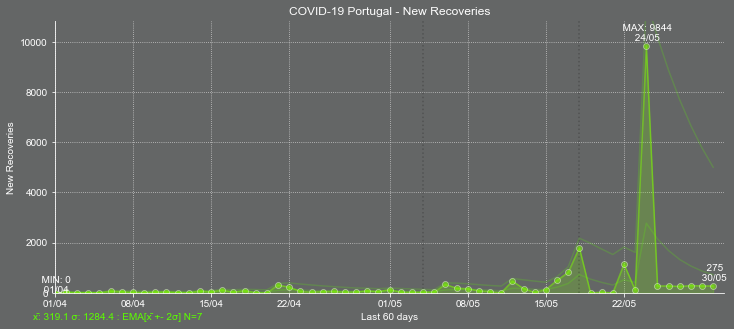

In [16]:
line_plot_df_tindex(
                d_new_recoveries['key']
                ,data=df_latest
                ,title='{} - {}'.format(s_title,d_new_recoveries['label'])
                ,ylabel=d_new_recoveries['label']
                ,ycolor=d_new_recoveries['color']
                ,evends_data = df_events
               )

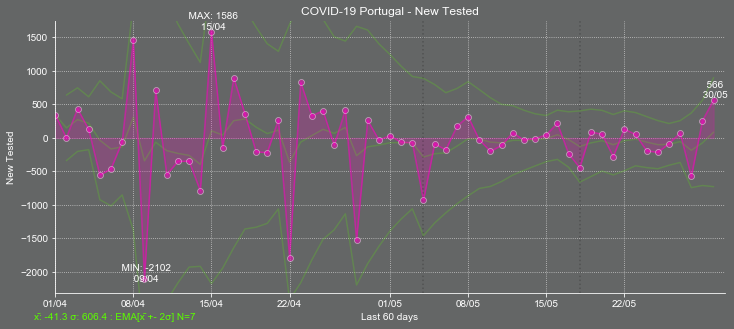

In [17]:
line_plot_df_tindex(
                d_new_tested['key']
                ,data=df_latest
                ,title='{} - {}'.format(s_title,d_new_tested['label'])
                ,ylabel=d_new_tested['label']
                ,ycolor=d_new_tested['color']
                ,evends_data = df_events
               )

In [18]:
# Trace outstanding vales
df_latest[[d_recoveries['key'],d_new_recoveries['key']]]['2020-05-17':'2020-05-24']

recuperados  recuperados_novos
data_dados                                
2020-05-17         4636              814.0
2020-05-18         6430             1794.0
2020-05-19         6431                1.0
2020-05-20         6452               21.0
2020-05-21         6452                0.0
2020-05-22         7590             1138.0
2020-05-23         7705              115.0
2020-05-24        17549             9844.0

<a href="https://covid19.min-saude.pt/wp-content/uploads/2020/05/83_DGS_boletim_20200524.pdf">Relatório de Situação nº 083 | 24/05/2020</a>
<br/>
<a href="https://rr.sapo.pt/2020/05/24/pais/balanco-dgs-quase-10-mil-novas-recuperacoes-num-dia/noticia/194014/">Balanço DGS. Quase 10 mil novas recuperações num dia<a/>


<a href="https://covid19.min-saude.pt/wp-content/uploads/2020/05/77_DGS_boletim_20200518.pdf">Relatório de Situação nº 077 | 18/05/2020</a>
<br/>
<a href="https://www.rtp.pt/noticias/pais/forte-subida-de-recuperados-deve-se-as-instituicoes-reportarem-mais-dgs_n1229822">Forte subida de recuperados deve-se às instituições reportarem mais - DGS<a/>

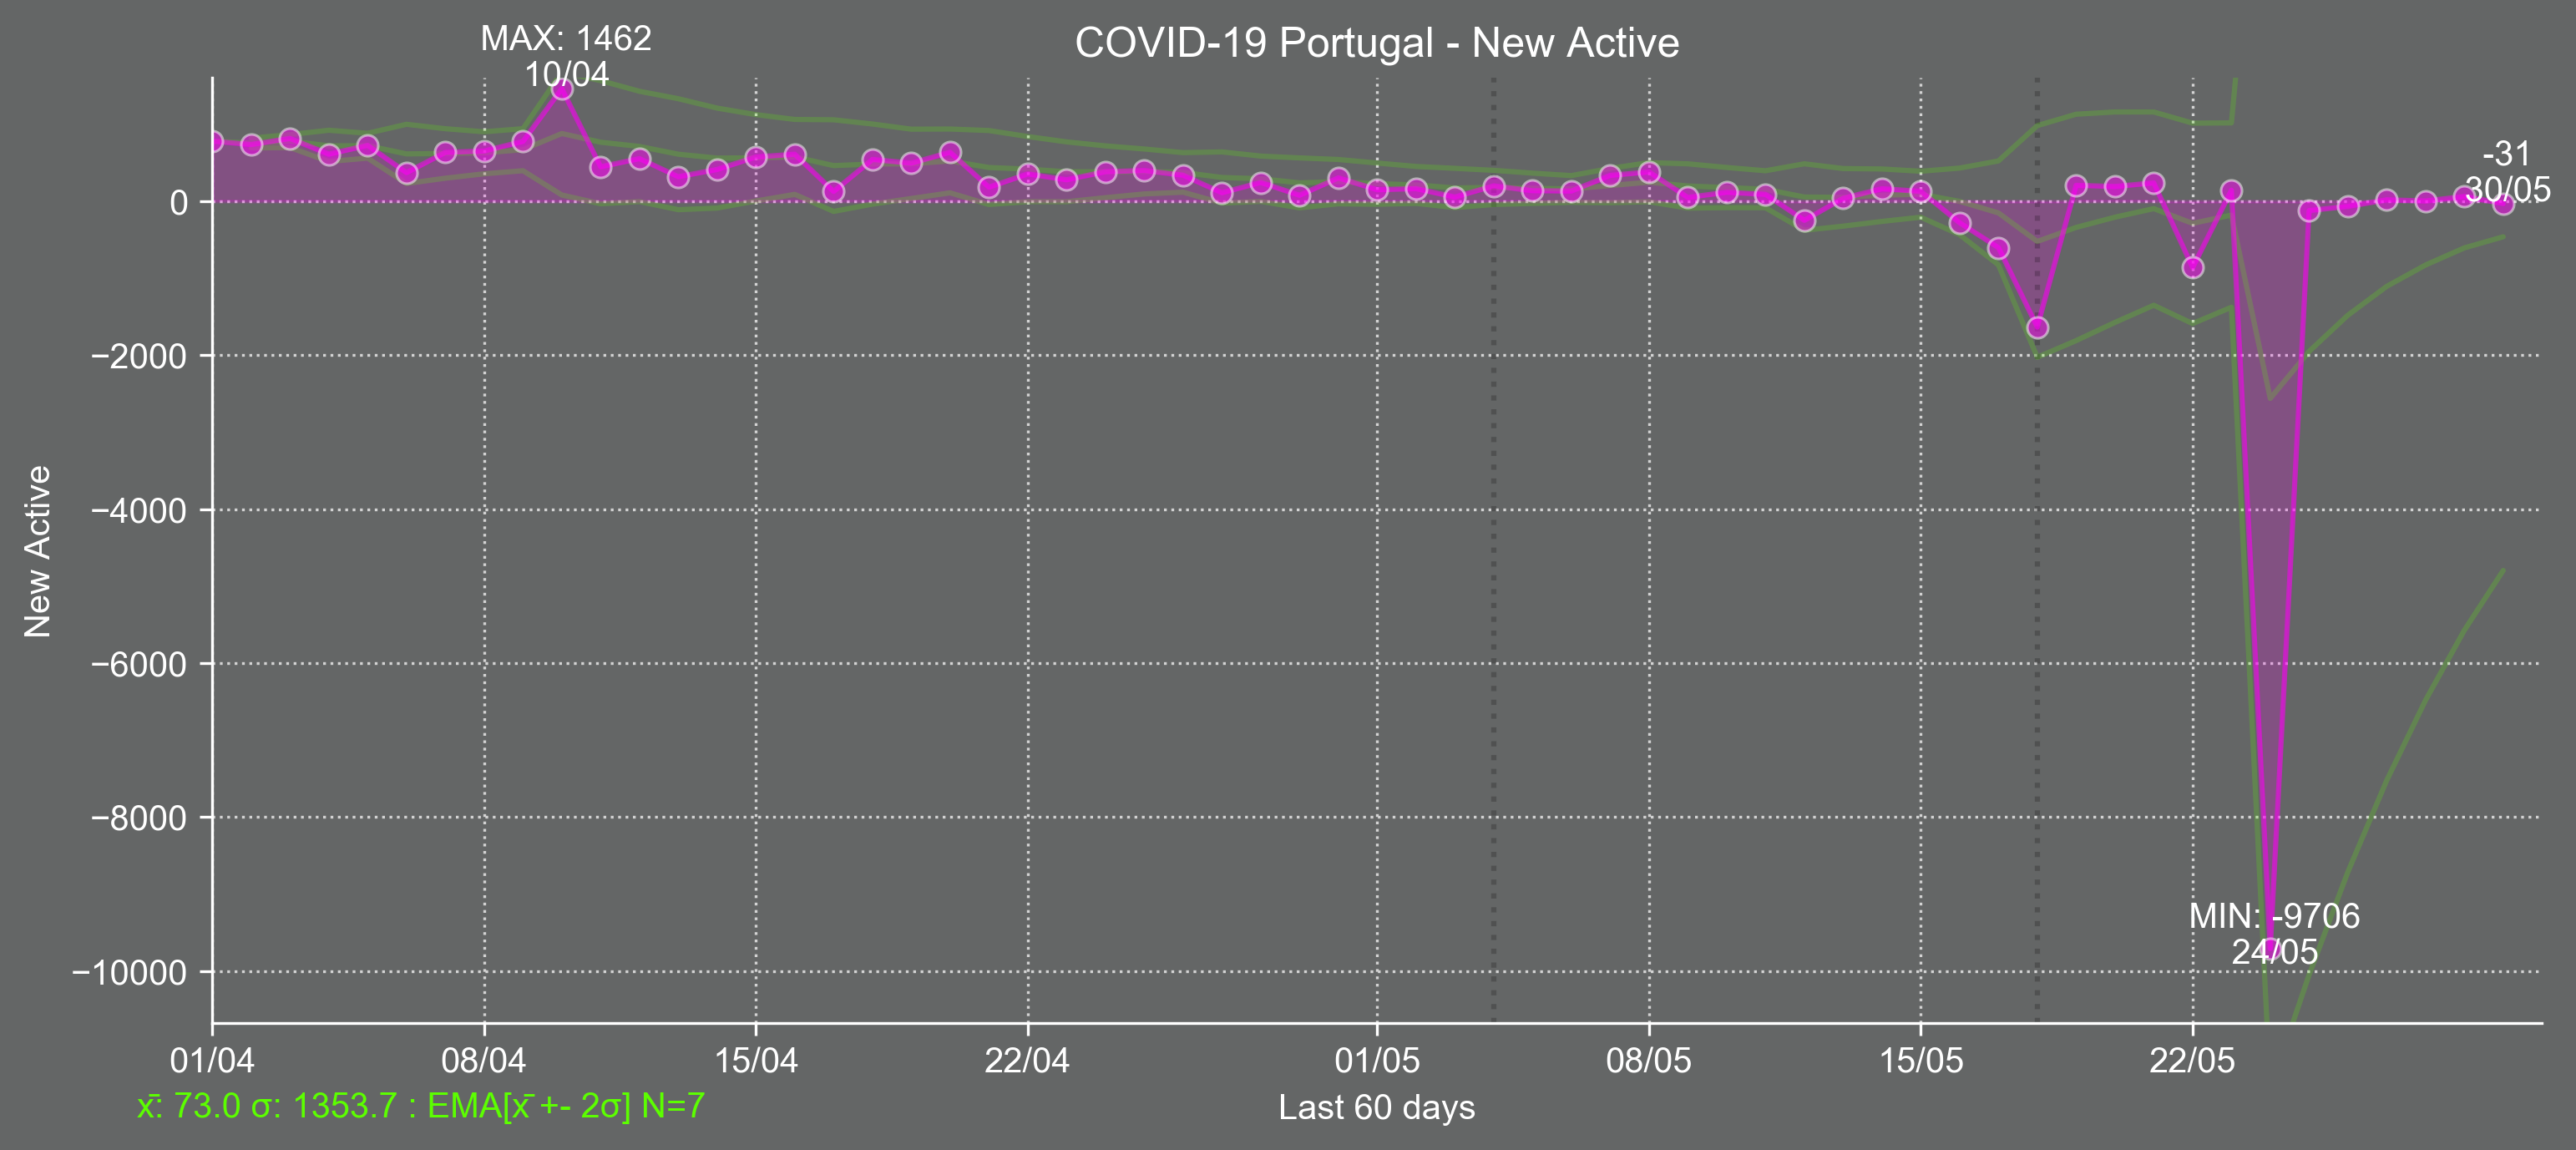

img\COVID-19 Portugal - New Active.png


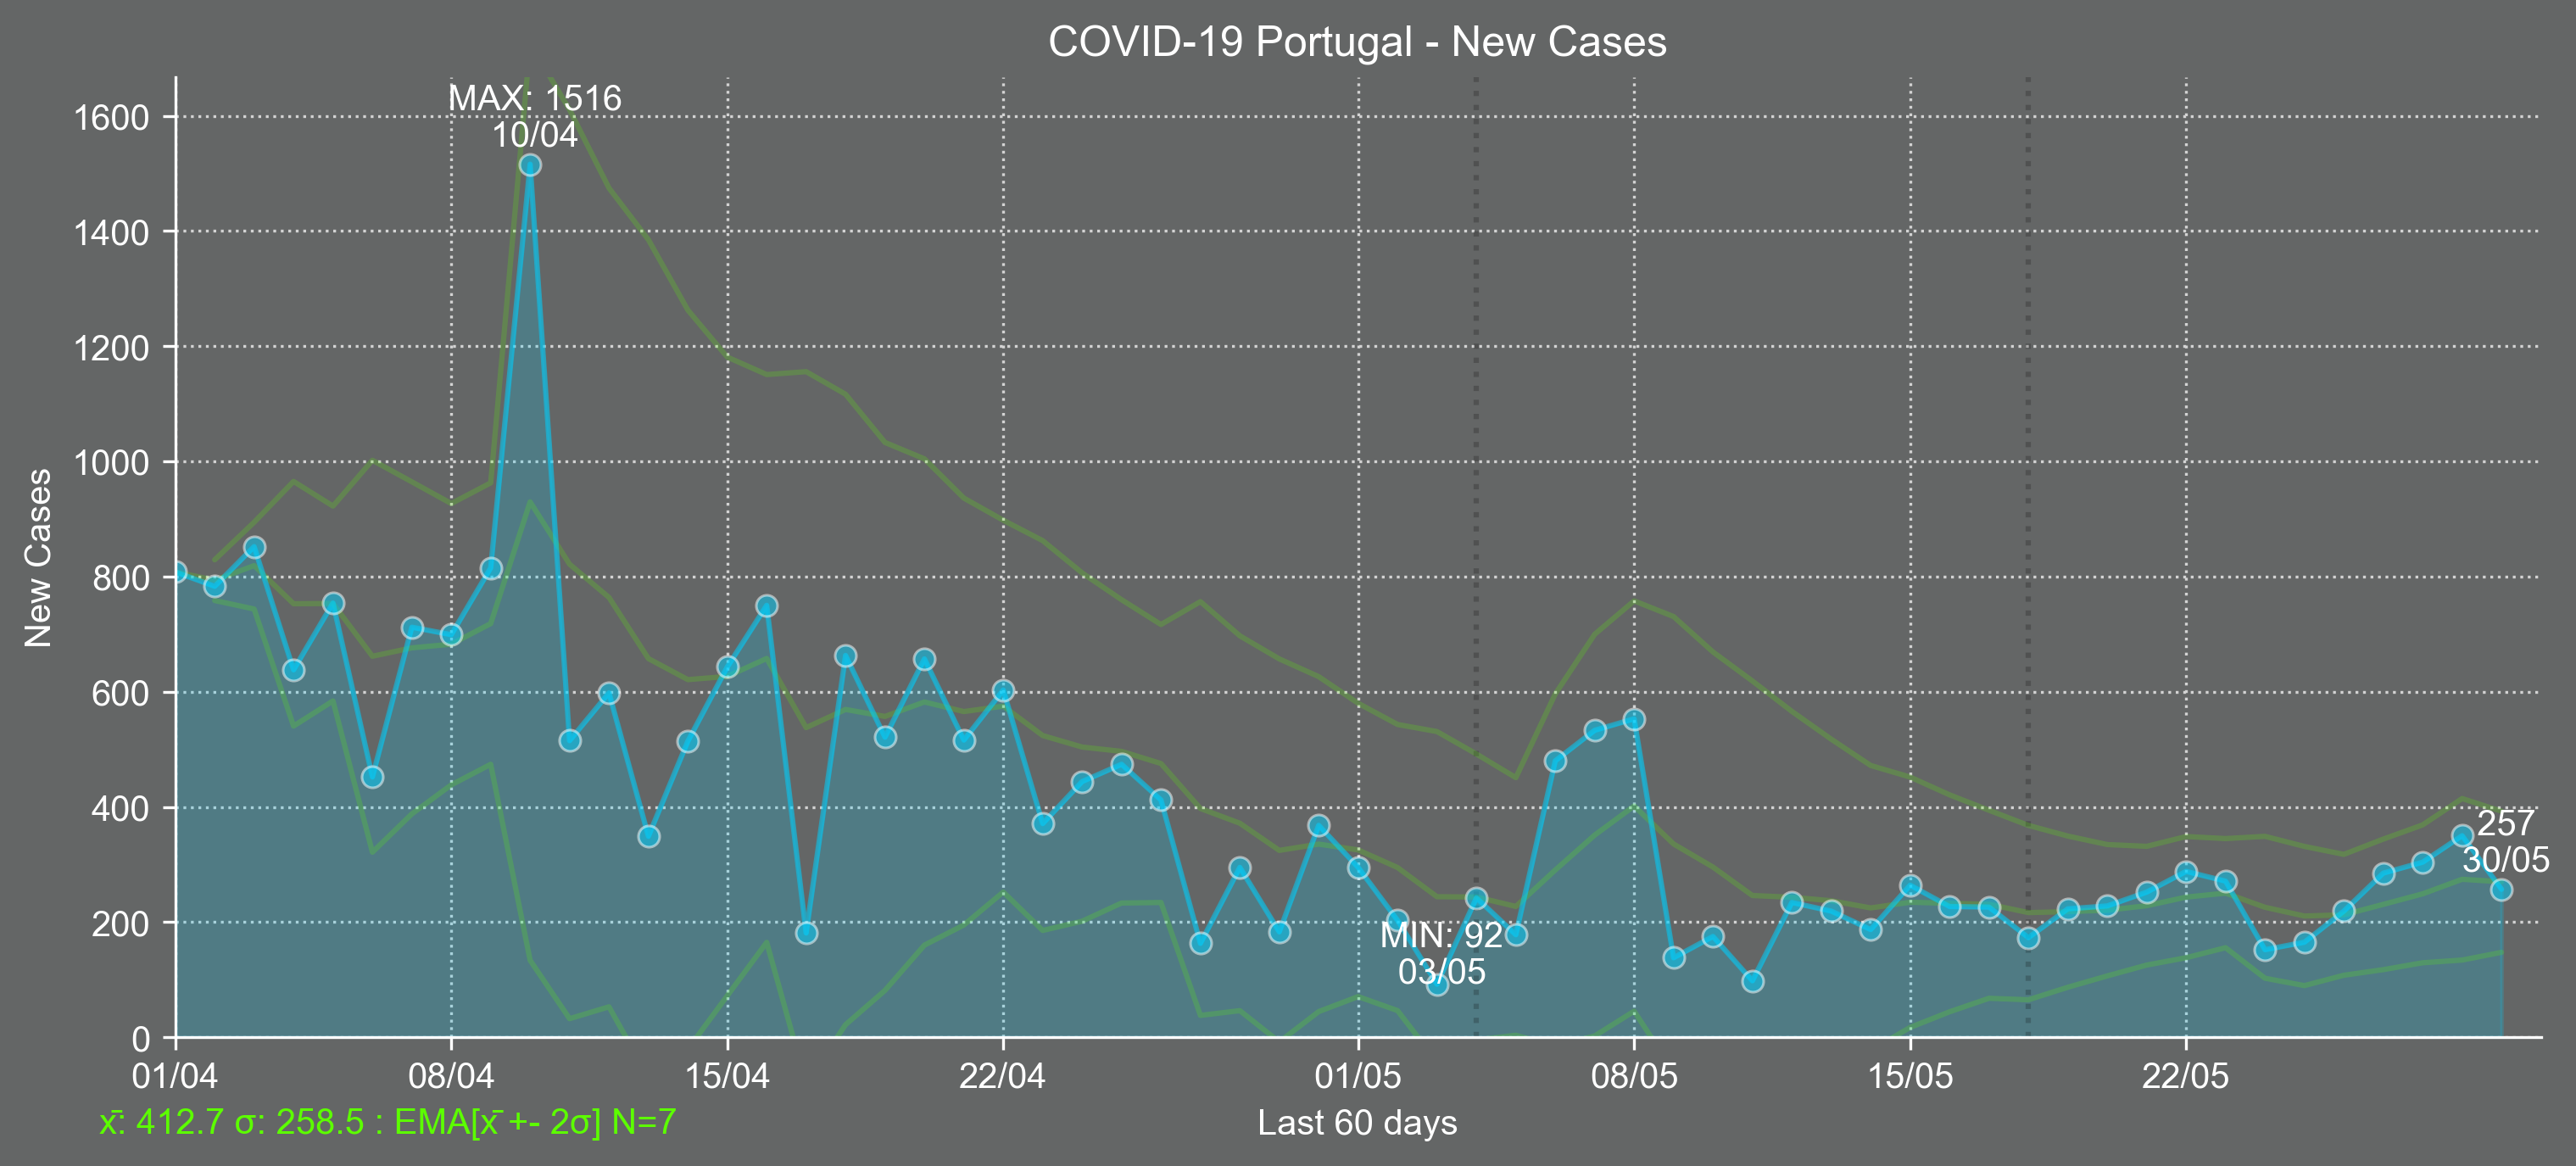

img\COVID-19 Portugal - New Cases.png


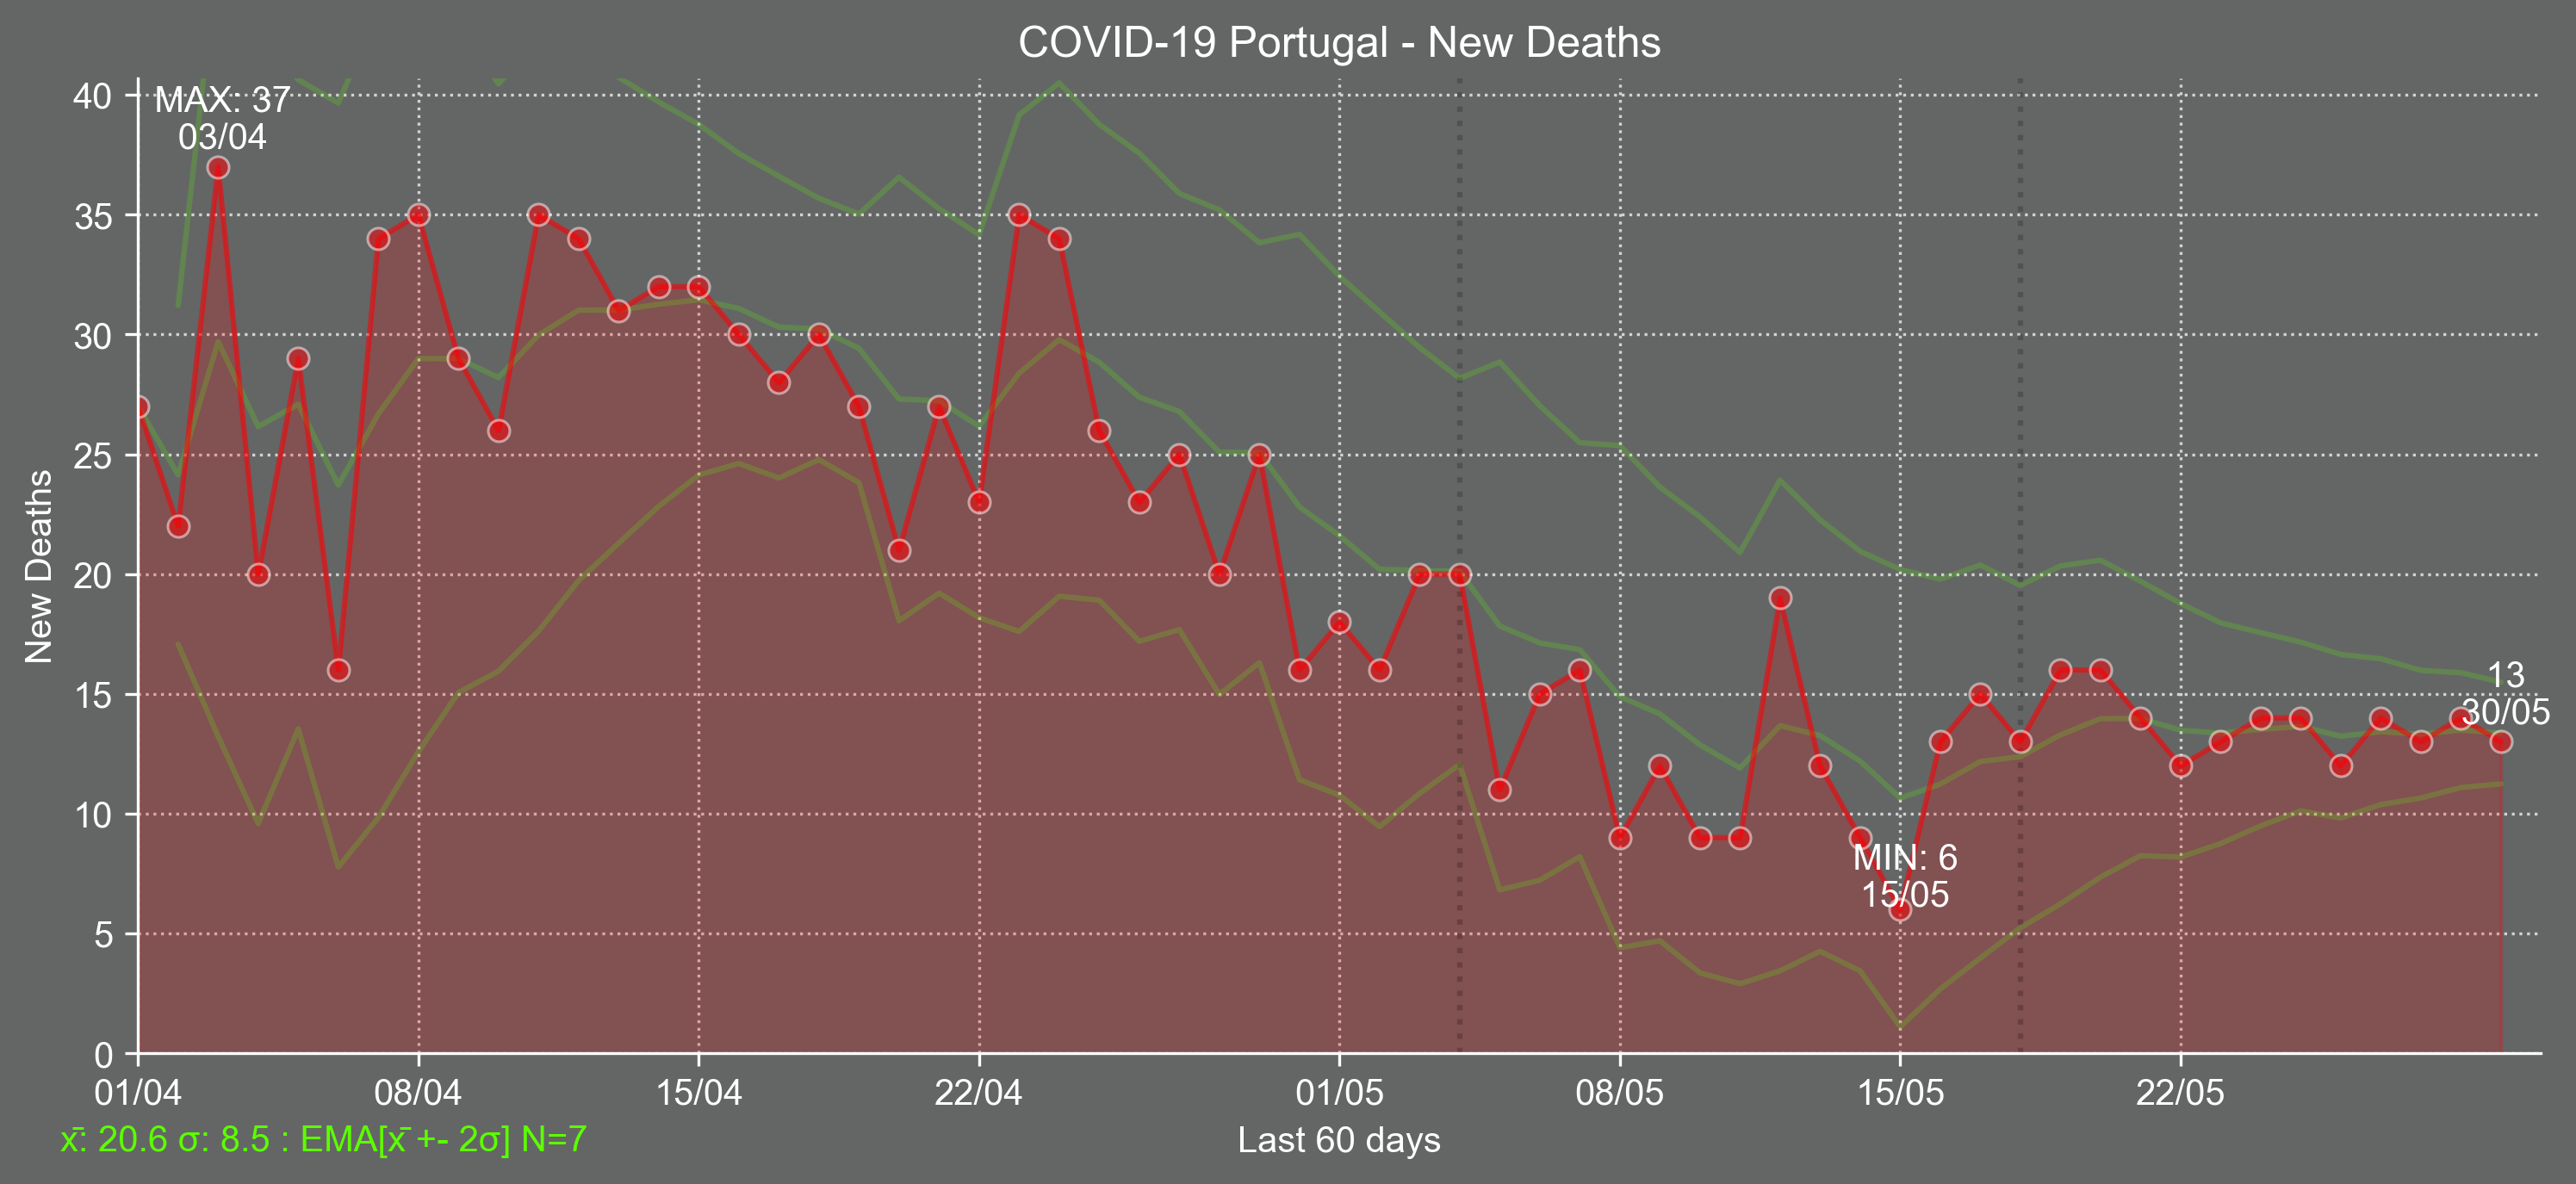

img\COVID-19 Portugal - New Deaths.png


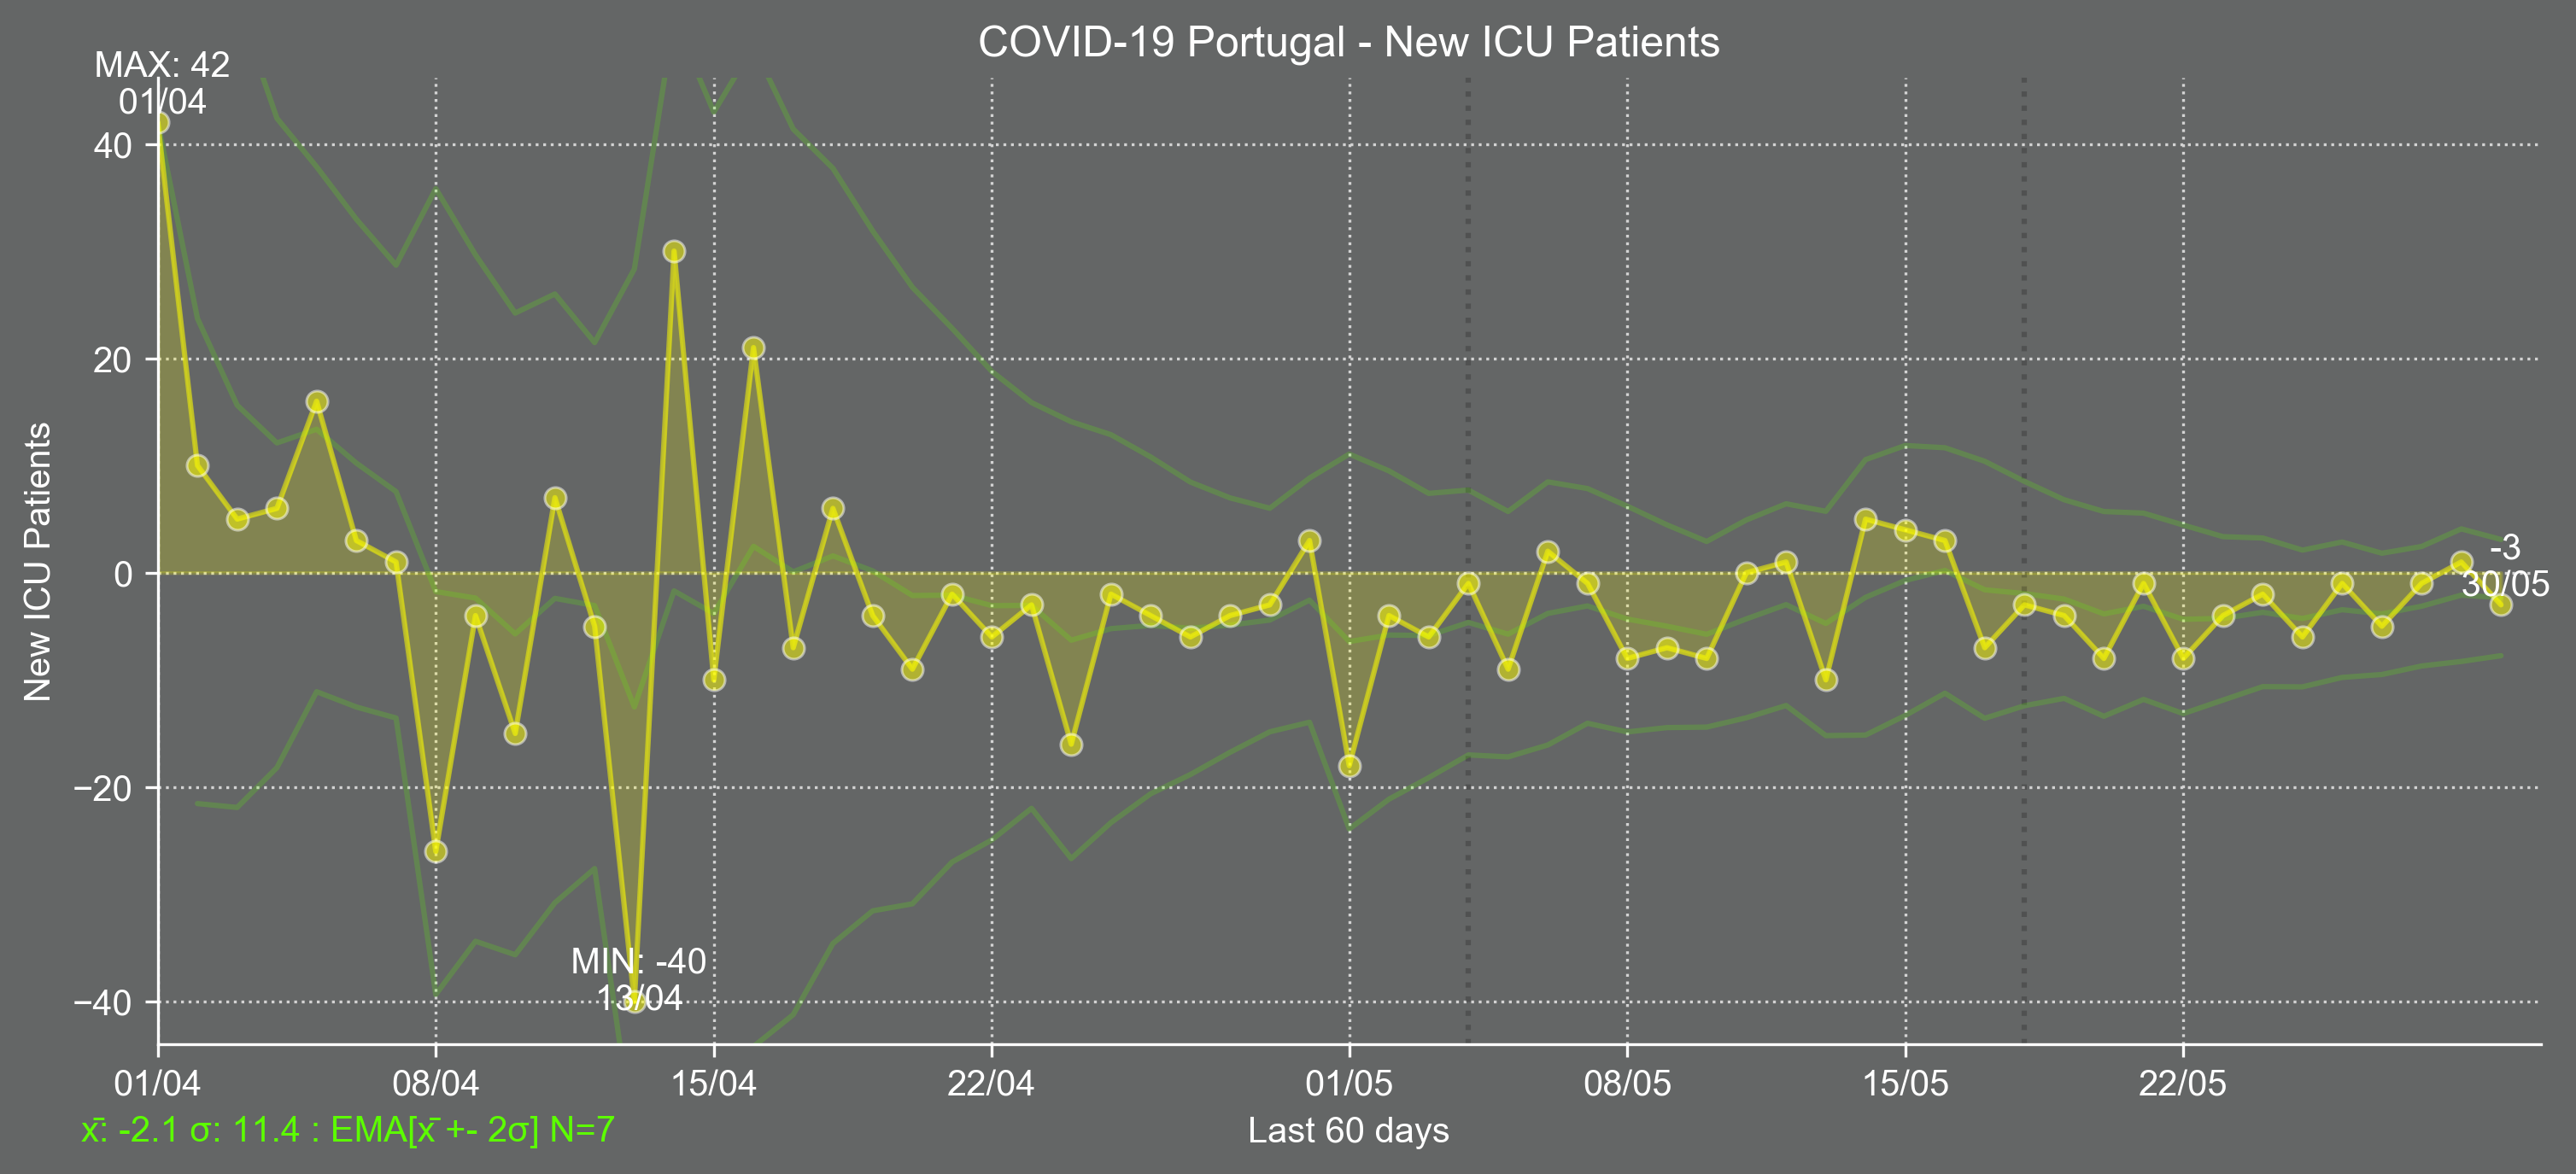

img\COVID-19 Portugal - New ICU Patients.png


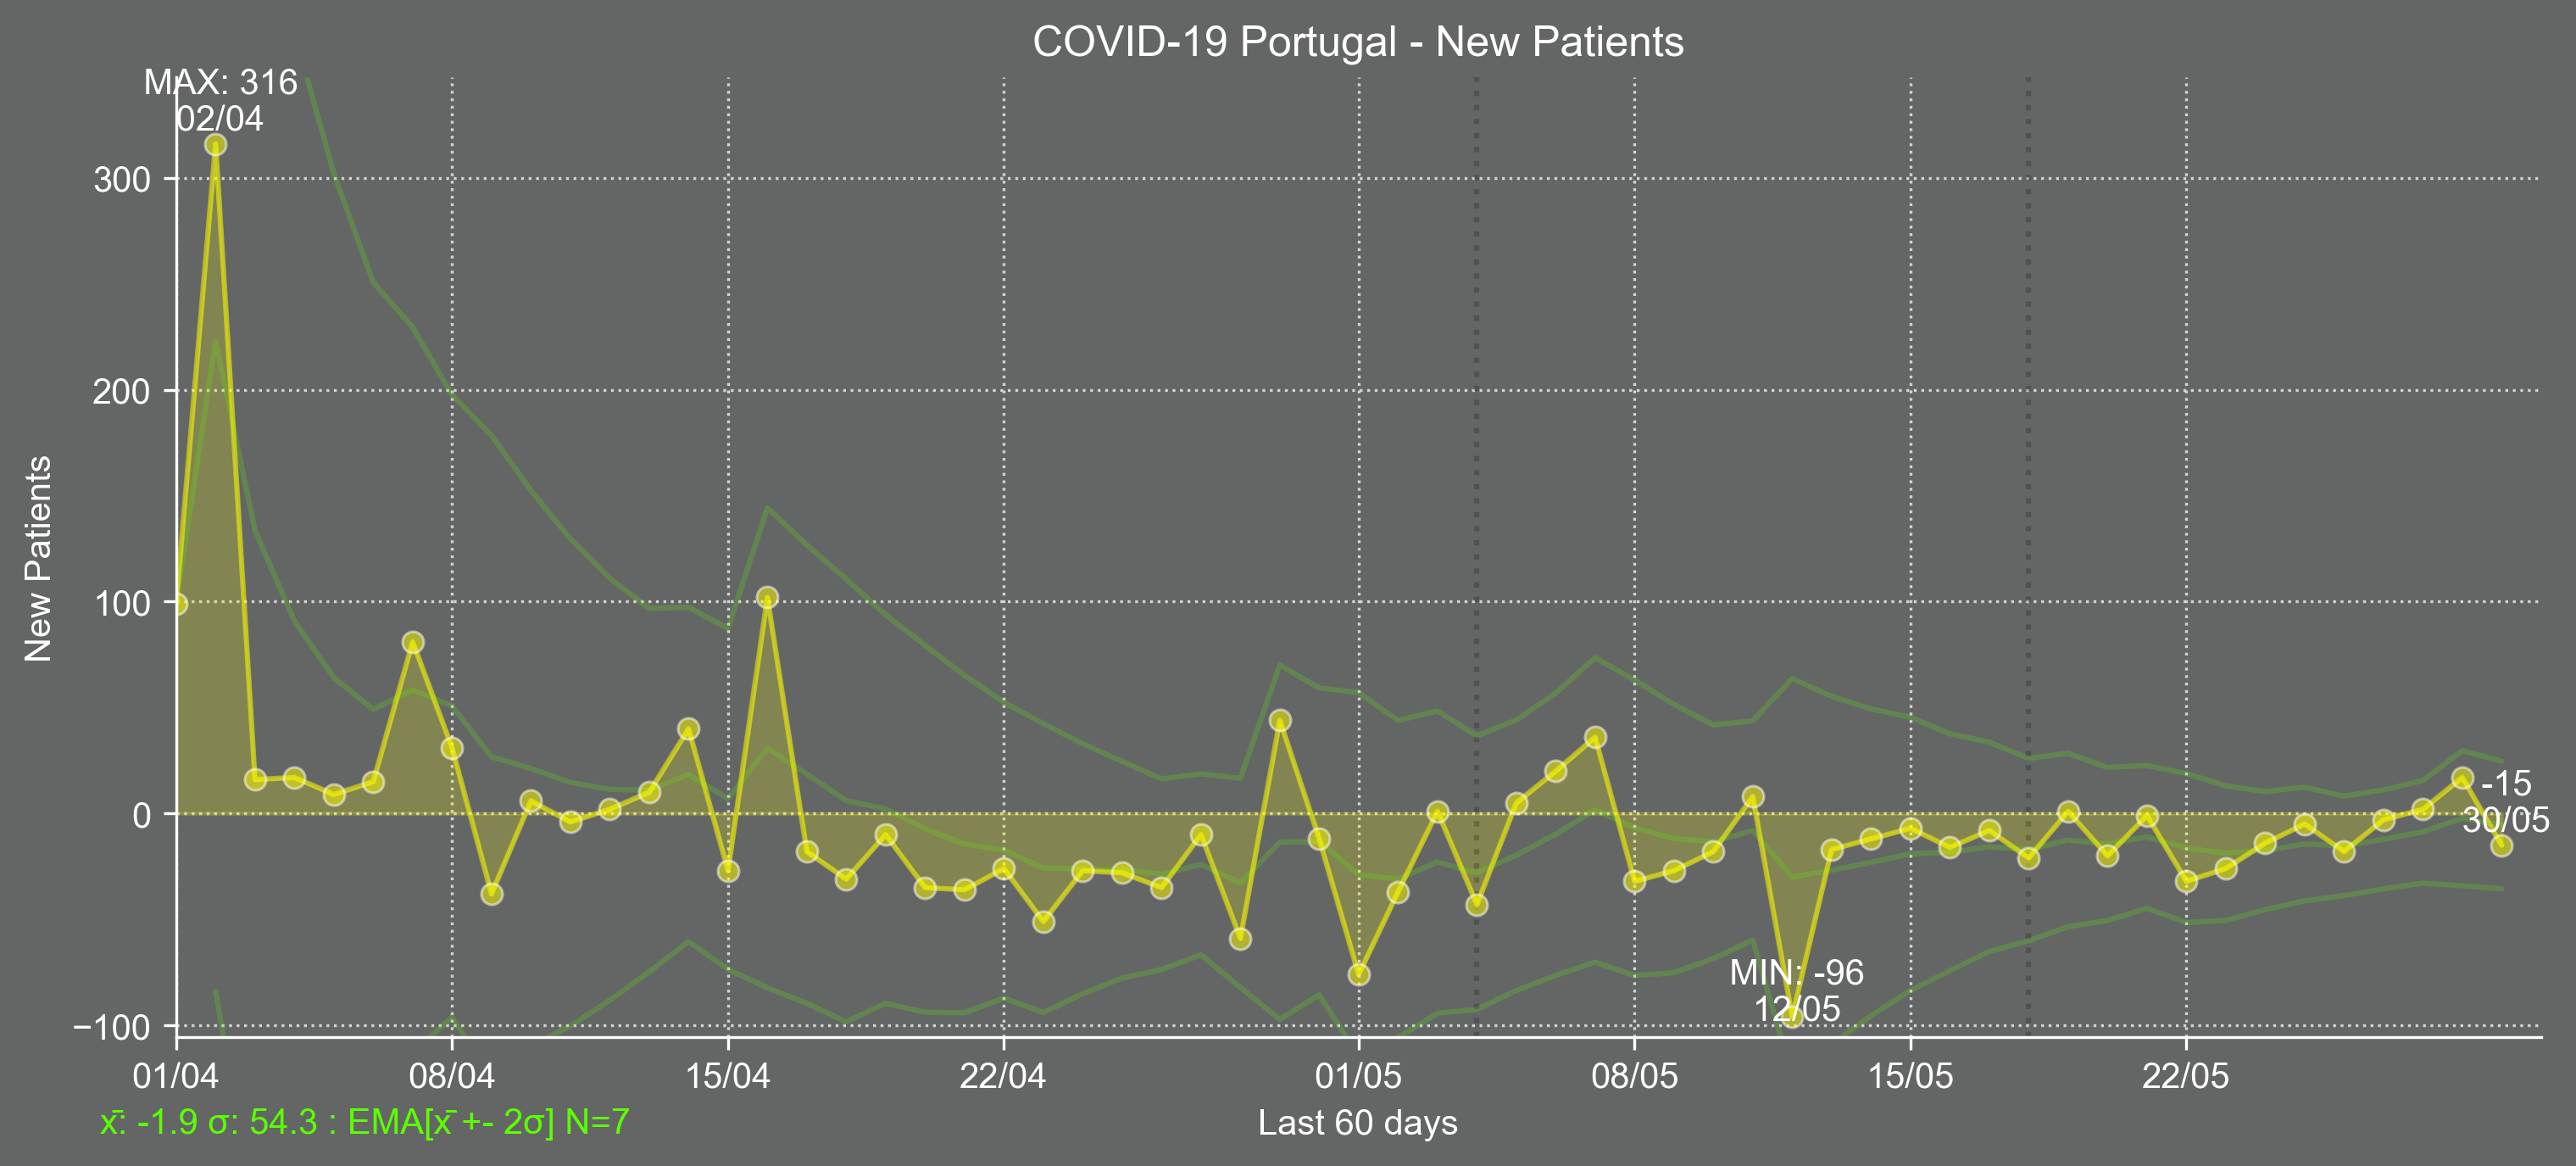

img\COVID-19 Portugal - New Patients.png


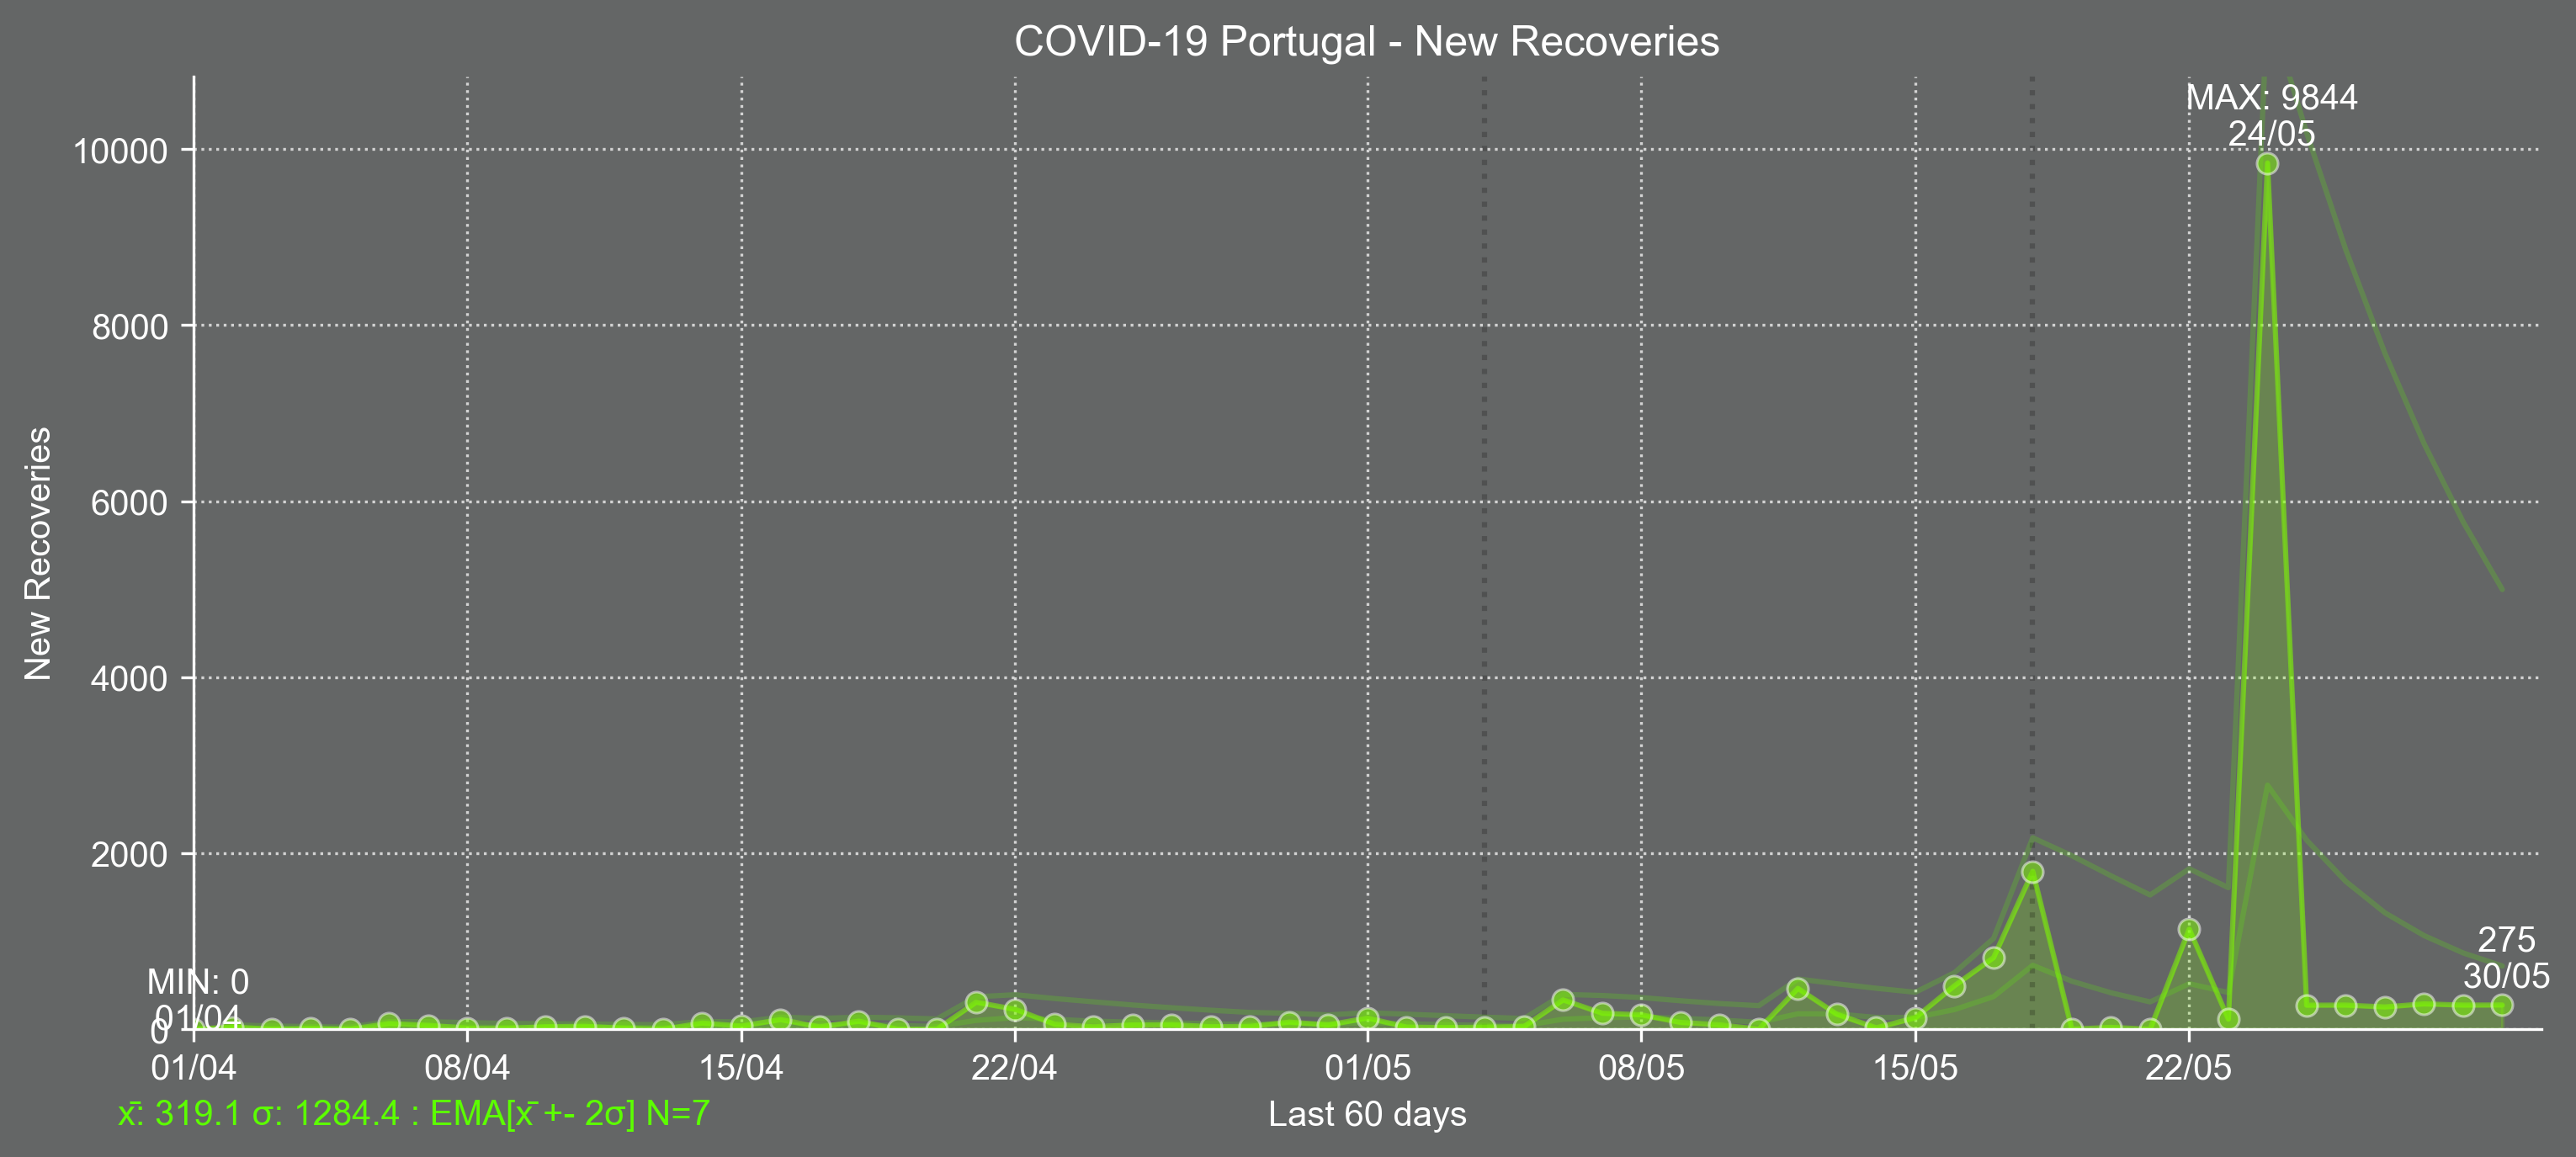

img\COVID-19 Portugal - New Recoveries.png


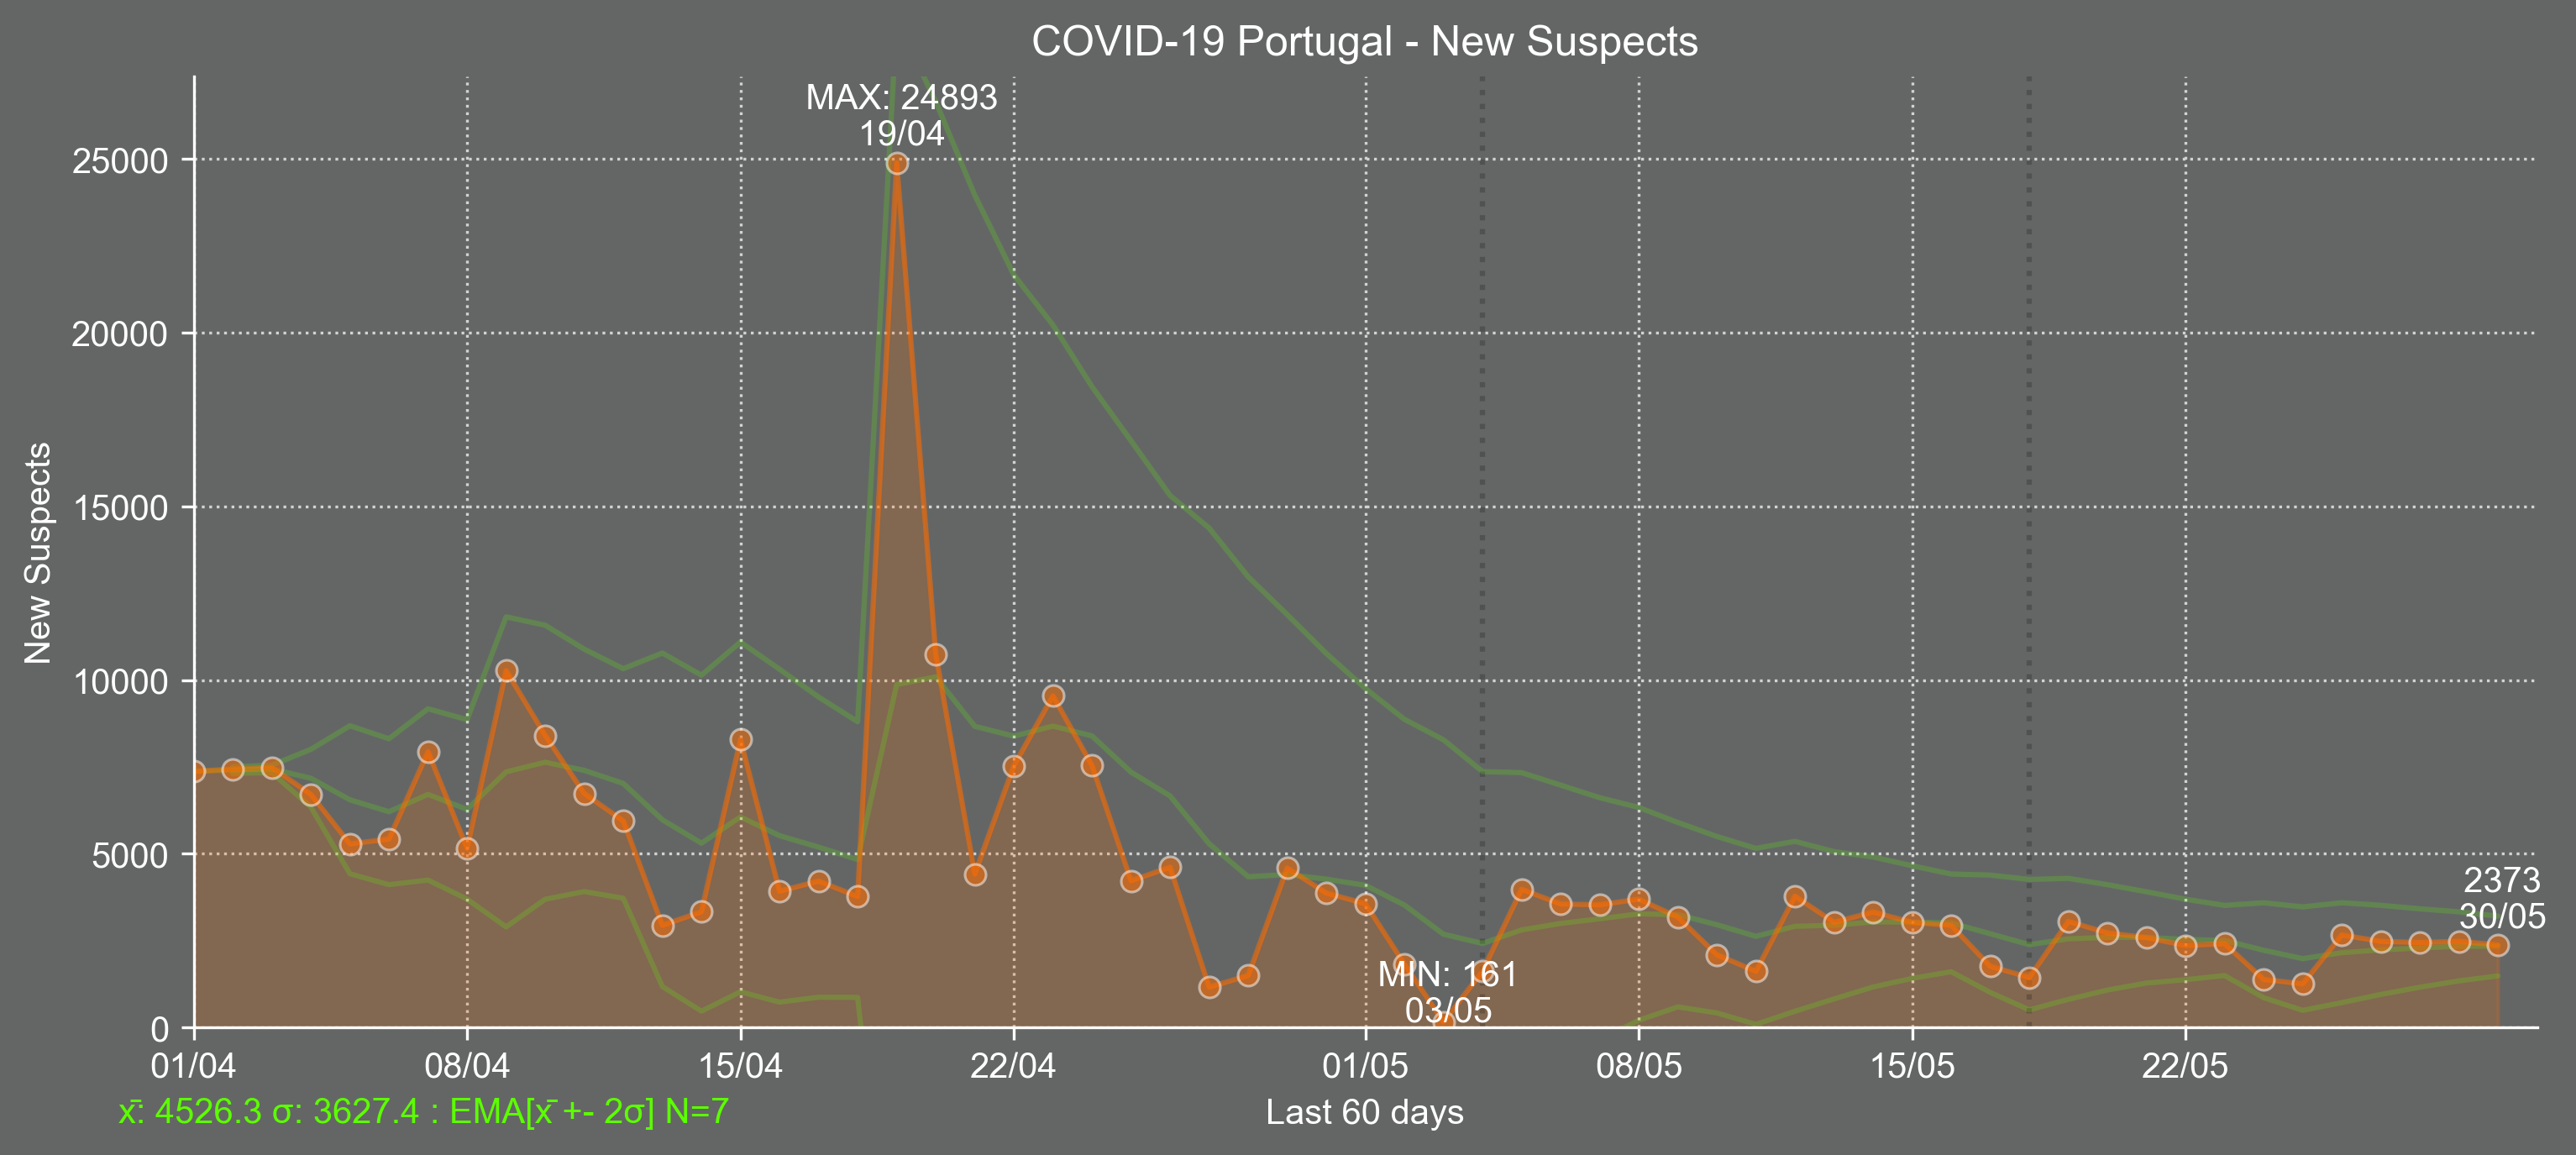

img\COVID-19 Portugal - New Suspects.png


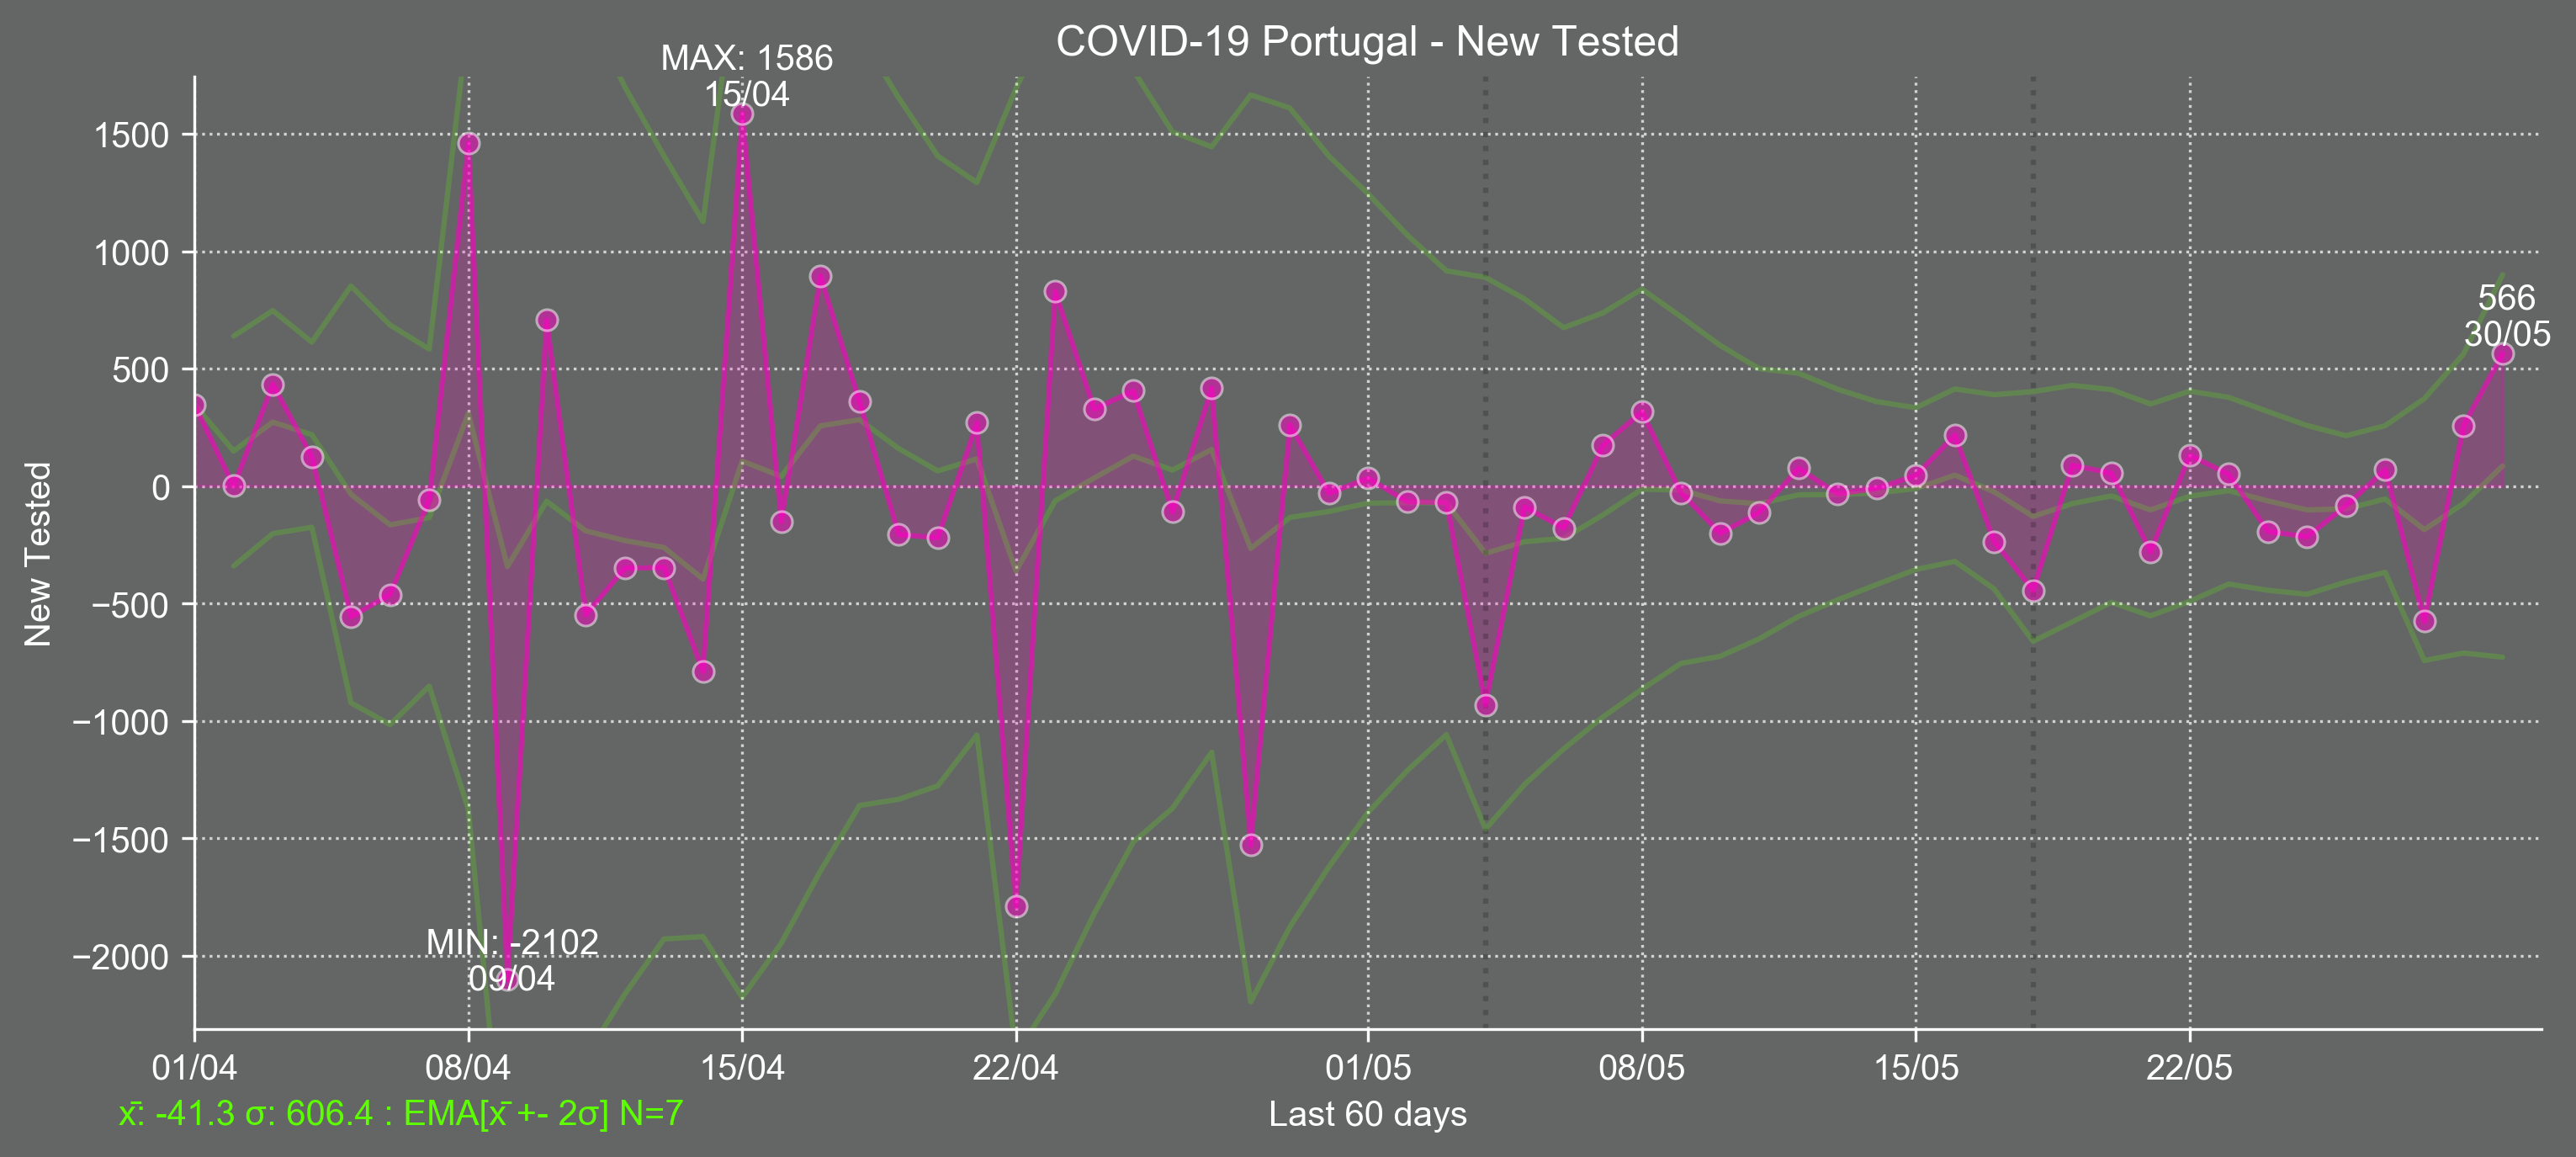

img\COVID-19 Portugal - New Tested.png


In [19]:
# Show saved chart images with 300 dpi
import glob
from IPython.display import Image, display
for imageName in glob.glob('img/{}*.png'.format(s_title)): 
    display(Image(filename=imageName))
    print(imageName)

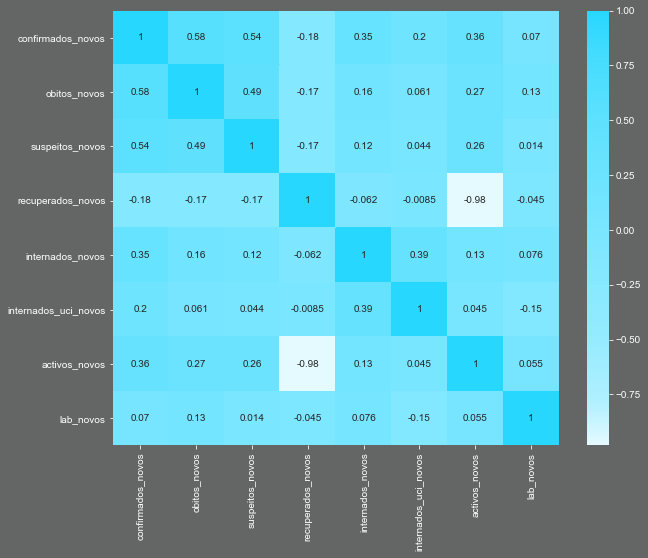

In [20]:
#Check correlation
from matplotlib.colors import LinearSegmentedColormap

fig = plt.figure(figsize=(10,8))

boundaries = [0.0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]  
hex_colors = sns.light_palette(d_confirmations['color'], n_colors=len(boundaries) * 2 + 2, as_cmap=False).as_hex()
hex_colors = [hex_colors[i] for i in range(0, len(hex_colors), 2)]
colors=list(zip(boundaries, hex_colors))
custom_color_map = LinearSegmentedColormap.from_list(
    name='custom_navy',
    colors=colors,
)

df_latest_corr = df_latest[[d_new_confirmations['key'],d_new_deaths['key'],d_new_suspects['key'],d_new_recoveries['key'],d_new_patients['key'],d_new_icu['key'],d_new_active['key'],d_new_tested['key']]].corr()
sns.heatmap(df_latest_corr,annot=True,cmap=custom_color_map)

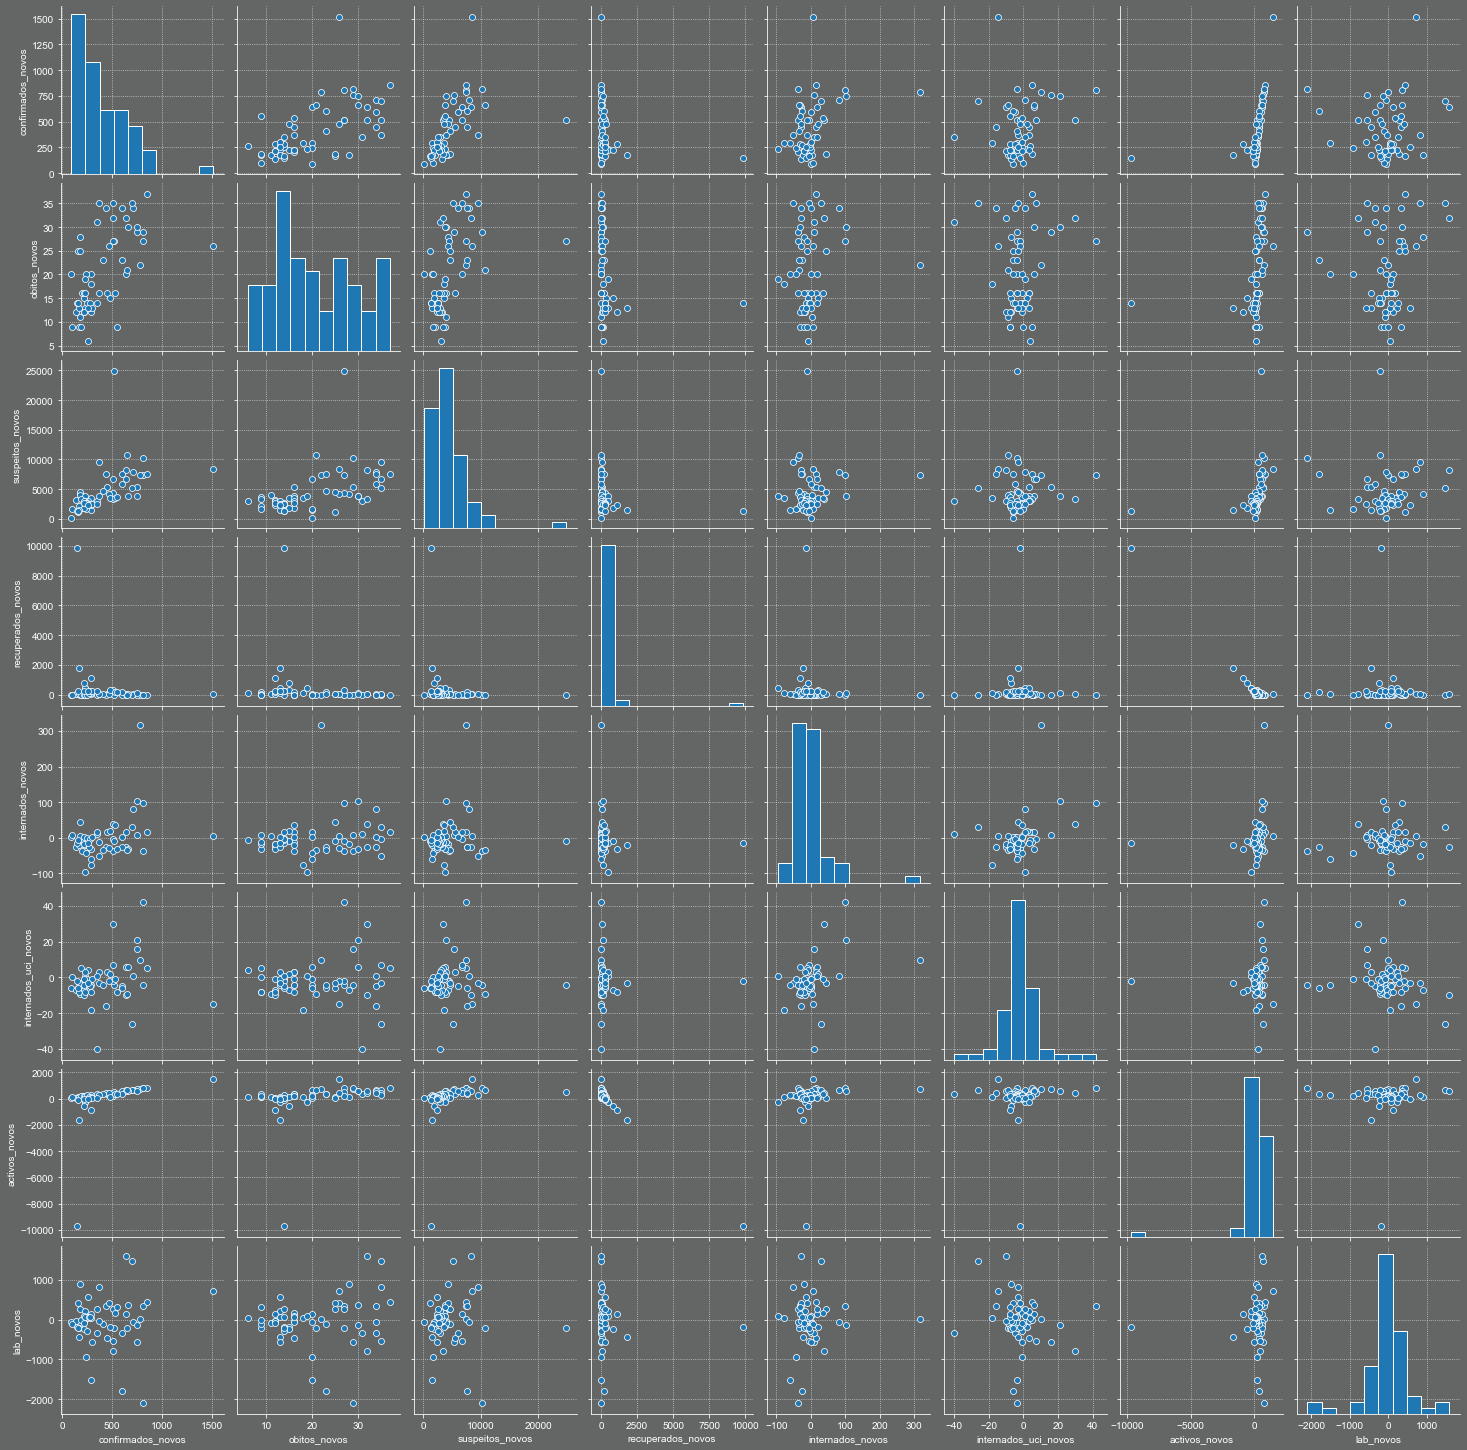

In [21]:
sns.pairplot(df_latest[[d_new_confirmations['key'],d_new_deaths['key'],d_new_suspects['key'],d_new_recoveries['key'],d_new_patients['key'],d_new_icu['key'],d_new_active['key'],d_new_tested['key']]])